# Market Volatility Predictor - Optiver (Kaggle Competition)

## Research

* What is Volatility?

* Why is predicting volatility important?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
import pyarrow.parquet as pq
import pyarrow as pa

In [2]:
train = pd.read_csv('data/train.csv')

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428932 entries, 0 to 428931
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   stock_id  428932 non-null  int64  
 1   time_id   428932 non-null  int64  
 2   target    428932 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 9.8 MB


In [6]:
train.head()

,stock_id,time_id,target
0,0,5,0.004136
1,0,11,0.001445
2,0,16,0.002168
3,0,31,0.002195
4,0,62,0.001747


In [7]:
book_train = pq.read_table('data/book_train.parquet')

In [8]:
book_df = book_train.to_pandas()

In [9]:
book_df.head()

,time_id,seconds_in_bucket,bid_price1,ask_price1,bid_price2,ask_price2,bid_size1,ask_size1,bid_size2,ask_size2,stock_id
0,5,0,1.001422,1.002301,1.00137,1.002353,3,226,2,100,0
1,5,1,1.001422,1.002301,1.00137,1.002353,3,100,2,100,0
2,5,5,1.001422,1.002301,1.00137,1.002405,3,100,2,100,0
3,5,6,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0
4,5,7,1.001422,1.002301,1.00137,1.002405,3,126,2,100,0


In [10]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167253289 entries, 0 to 167253288
Data columns (total 11 columns):
 #   Column             Dtype   
---  ------             -----   
 0   time_id            int16   
 1   seconds_in_bucket  int16   
 2   bid_price1         float32 
 3   ask_price1         float32 
 4   bid_price2         float32 
 5   ask_price2         float32 
 6   bid_size1          int32   
 7   ask_size1          int32   
 8   bid_size2          int32   
 9   ask_size2          int32   
 10  stock_id           category
dtypes: category(1), float32(4), int16(2), int32(4)
memory usage: 5.8 GB


In [9]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor

ImportError: cannot import name '_raise_dep_warning_if_not_pytest' from 'sklearn.utils.deprecation' (/Users/jamiedowat/PySpace/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py)

<AxesSubplot:xlabel='time_id'>

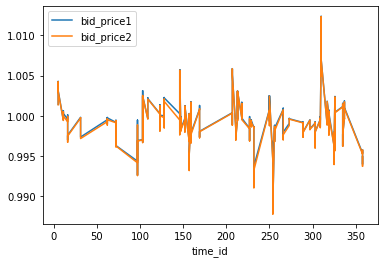

In [11]:
book_df[['time_id', 'bid_price1', 'bid_price2']].set_index('time_id').iloc[:10000].plot()

In [12]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

from scipy.optimize import minimize
import statsmodels.tsa.api as smt
import statsmodels.api as sm

from tqdm import tqdm_notebook

from itertools import product


In [15]:
model = sm.tsa.statespace.SARIMAX(train.iloc[:50000].target).fit(disp=-1)

In [17]:
preds = model.predict()

No handles with labels found to put in legend.


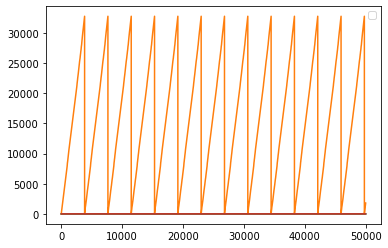

In [20]:
plt.plot(train.iloc[:50000])
plt.plot(preds)

In [16]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 target   No. Observations:                50000
Model:               SARIMAX(1, 0, 0)   Log Likelihood              209798.879
Date:                Fri, 09 Jul 2021   AIC                        -419593.757
Time:                        21:01:57   BIC                        -419576.118
Sample:                             0   HQIC                       -419588.232
                              - 50000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7302      0.002    351.126      0.000       0.726       0.734
sigma2      1.327e-05   4.35e-08    304.961      0.000    1.32e-05    1.34e-05
===================================================================================
Ljung-Box (L1) (Q):               10882.59   Jarque-Bera (JB):             72731.13
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.93   Skew:                             0.85
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.66
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Using pipeline

In [3]:
from src import modeling

In [4]:
test = modeling.volatility_pipeline()

In [5]:
test.fit(train)

In [6]:
test.data

,stock_id,time_id,target
100002,29,3457,0.000653
100003,29,3465,0.000401
100004,29,3469,0.001564
100005,29,3484,0.002703
100006,29,3486,0.001603
...,...,...,...
199997,59,6939,0.002145
199998,59,6940,0.002023
199999,59,6941,0.004707
200000,59,6944,0.003630
